# Outlier

a data point significantly different from other data points in a dataset. Because of outliers there will be in mistake in prediction.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
print(dataset.isnull().sum())
print("\nInfo of dataset\n")
print(dataset.info())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     16
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   

In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,598.000000,564.000000
mean,5403.459283,1621.245798,146.412162,341.939799,0.842199
std,6109.041673,2926.248369,85.587325,65.221050,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Finding OutLier : using box plot and distribution plots

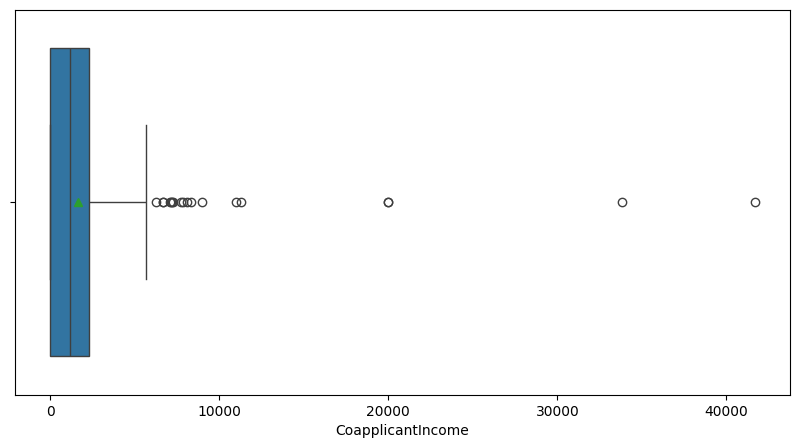

In [6]:
# By checking dataset :

# There is most probability of having outliers in the ApplicantIncome and CoapplicantIncome table.\

# Best way to find outlier is : a box plot or distrubution plot .

plt.figure(figsize= (10,5))
sns.boxplot(x="CoapplicantIncome",data=dataset,showmeans=True)
plt.show()



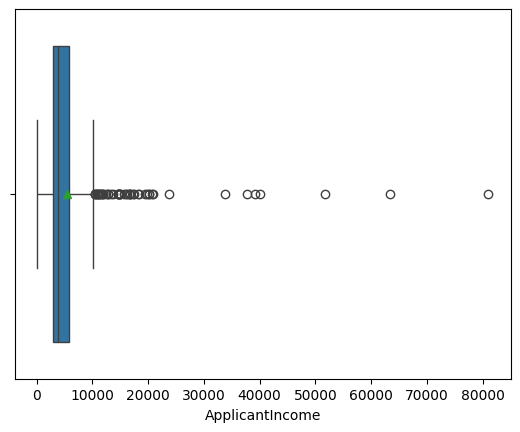

In [7]:
sns.boxplot(x="ApplicantIncome",data=dataset,showmeans=True)
plt.show()

/tmp/ipykernel_18487/2948072296.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


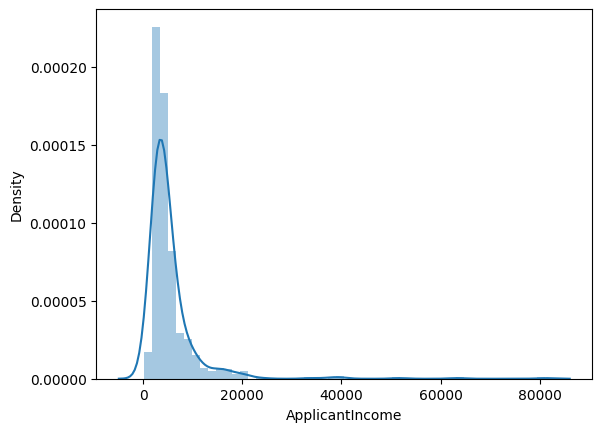

In [8]:
#  Using distribution plt :

sns.distplot(dataset["ApplicantIncome"])
plt.show()

# Removing or Handling Outliers

# 1 . IQR Method  : 

for Removing outliers,
Interquartile Range (IQR) is a technique that detects outliers by measuring the variability in a dataset
 the interquartile range (IQR) is a measure of statistical dispersion, which is the spread of the data. The IQR may also be called the midspread, middle 50%, fourth spread, or H‑spread. It is defined as the difference between the 75th and 25th percentiles of the data.

Percentile = 100 mein se 4 marks means 96 percentile.

Quantile = > it is the small parts of the percentile or
each of any set of values of a variate which divide a frequency distribution into equal groups, each containing the same fraction of the total population.


Q1 : 25 percemtile pr data is first quantile.

Q3 : 75 percentile pr data is third quantile.

IQR : Q3 - Q1

Min and Max : end points or caps of the whisker part of the box plot.

Min =: Q1 - (1.5 * IQR) ,  min range can have outlier , depends on the dataset.

Max =: Q3 + (1.5 * IQR)  , max can also have outlier

outside the range( min , max ) data is  outlier .



In [9]:
# Detect  and remove Outlier.

# quantile() : method to get quantile.

print(dataset.shape)

q1 = dataset["CoapplicantIncome"].quantile(0.25) # 25percentile
q3 = dataset["CoapplicantIncome"].quantile(0.75) # 75percentile

iqr = q3 -q1

min_range = q1 - (1.5*iqr)
max_range = q3 + (1.5*iqr)


print("\nQ1 : ",q1) # we can also get quantile using describle function
print("\nQ3 : ",q3)

print("\nIrs :",iqr)
print("\nMin And Max :" , min_range ,"& ", max_range)


(614, 13)

Q1 :  0.0

Q3 :  2297.25

Irs : 2297.25

Min And Max : -3445.875 &  5743.125


In [10]:
# now to remove outlier we need that values which is less than max_range

new_dataset = dataset[dataset["CoapplicantIncome"] <= max_range]
new_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


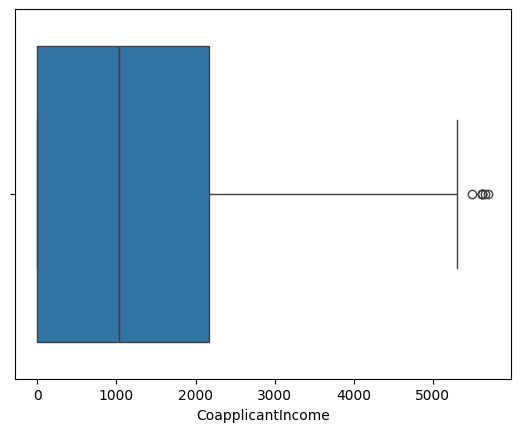

In [11]:
new_dataset.shape # outliers gone

sns.boxplot(x ="CoapplicantIncome",data=new_dataset)
plt.show()

# 2. z Score : 

It is a statistical measurement that describes how far a data point is from the mean, expressed in terms of standard deviations. It helps us to identify if a data point is relatively higher or lower than the mean and how far it deviates from the average value.

formula :  z = (x - mean)/ standard deviaton

In [20]:
dataset3 = pd.read_csv("loan.csv")
dataset3.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [21]:
dataset3.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     16
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
dataset2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,598.000000,564.000000
mean,5403.459283,1621.245798,146.412162,341.939799,0.842199
std,6109.041673,2926.248369,85.587325,65.221050,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


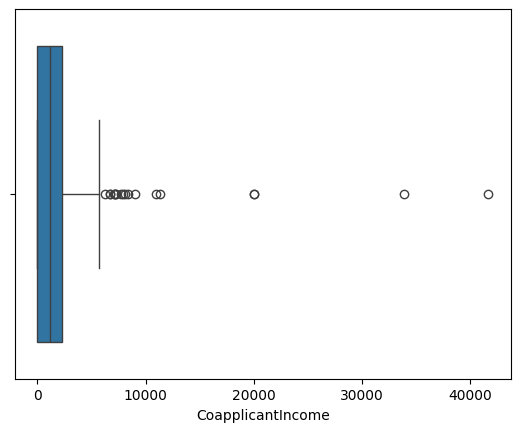

In [27]:
sns.boxplot(x ="CoapplicantIncome",data=dataset3)
plt.show()

/tmp/ipykernel_18487/4185486733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset3["CoapplicantIncome"])


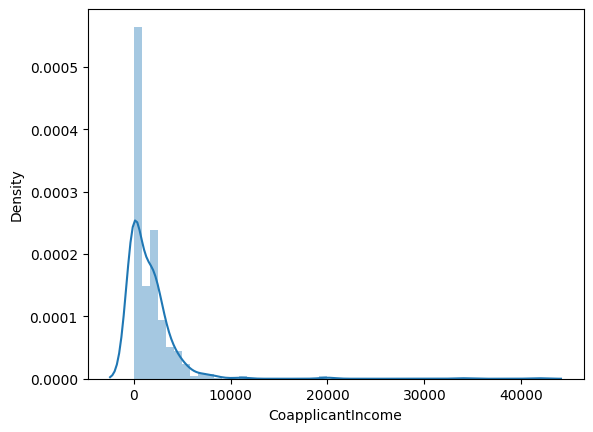

In [29]:
sns.distplot(dataset3["CoapplicantIncome"])
plt.show()

In [44]:
dataset3.shape

(614, 14)

Direct Method of z Score :

In [34]:
mean_dataset3 = dataset3["CoapplicantIncome"].mean() # mean
sd_dataset3 = dataset3["CoapplicantIncome"].std() # standard deviation

min_range = mean_dataset3 - (3*sd_dataset3)
max_range = mean_dataset3 + (3*sd_dataset3)

print("\nMin range  :" ,min_range) # negative means no outlier
print("\nMax range  :",max_range)


Min range  : -7157.4993096454655

Max range  : 10399.990905699668


In [35]:
new_dataset3 = dataset3[dataset3["CoapplicantIncome"]  <= max_range ] # removing outlier 
new_dataset3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='CoapplicantIncome'>

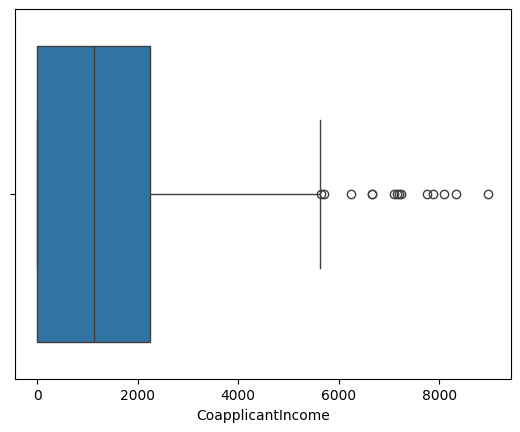

In [37]:
sns.boxplot(x="CoapplicantIncome",data= new_dataset3)

By ZScore formula :


In [39]:
z_score = (dataset3["CoapplicantIncome"] - mean_dataset3 )/sd_dataset3

z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [42]:
dataset3["z_score"] = z_score
dataset3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [ ]:
# now remove outlier 

dataset3[dataset3["z_score"] < 3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036
